In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv('../input/house-pricecsv/kc_house_data.csv')

In [5]:
df = df.drop('id',axis=1)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['month'] = df['date'].apply(lambda date:date.month)

In [8]:
df['year'] = df['date'].apply(lambda date:date.year)

In [10]:
df = df.drop('date',axis=1)

In [11]:
df = df.drop('zipcode',axis=1)

In [12]:
X = df.drop('price',axis=1)
y = df['price']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(15129, 19)

#Keras-- ANN

In [20]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [43]:
# having 19 nueron is based on the number of available features

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [44]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=300)

Epoch 1/300
119/119 [==============================] - 0s 3ms/step - loss: 423626964992.0000 - val_loss: 433021550592.0000
Epoch 2/300
119/119 [==============================] - 0s 2ms/step - loss: 422886244352.0000 - val_loss: 430462468096.0000
Epoch 3/300
119/119 [==============================] - 0s 2ms/step - loss: 412861530112.0000 - val_loss: 406958637056.0000
Epoch 4/300
119/119 [==============================] - 0s 2ms/step - loss: 361280831488.0000 - val_loss: 316974235648.0000
Epoch 5/300
119/119 [==============================] - 0s 2ms/step - loss: 235287363584.0000 - val_loss: 167763918848.0000
Epoch 6/300
119/119 [==============================] - 0s 2ms/step - loss: 121382846464.0000 - val_loss: 107263565824.0000
Epoch 7/300
119/119 [==============================] - 0s 2ms/step - loss: 99542089728.0000 - val_loss: 103777181696.0000
Epoch 8/300
119/119 [==============================] - 0s 2ms/step - loss: 97881620480.0000 - val_loss: 102283780096.0000
Epoch 9/300
119/11

In [45]:
losses = pd.DataFrame(model.history.history)

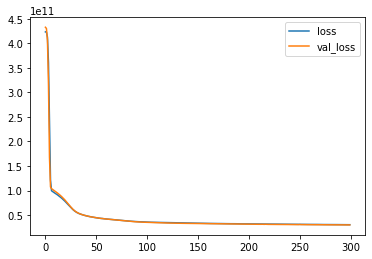

In [46]:
losses.plot()

In [47]:
#Evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [48]:
predictions = model.predict(X_test)

In [49]:
mean_absolute_error(y_test,predictions)

106933.23490756092

In [50]:
mean_squared_error(y_test,predictions)

29833892700.748795

In [52]:
mean_squared_error(y_test,predictionslr)**0.5

203479.7356419374

In [51]:
explained_variance_score(y_test,predictions)

0.787473512354441

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

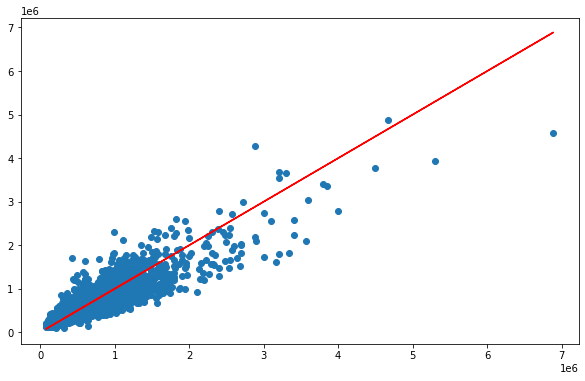

In [54]:
# Our predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

2---linear regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()

In [57]:
lr.fit(X_train,y_train)

LinearRegression()

In [58]:
predictionslr = lr.predict(X_test)

In [59]:
mean_absolute_error(y_test,predictionslr)

125975.45429100191

In [38]:
mean_squared_error(y_test,predictionslr)

41404002816.912735

In [ ]:
mean_squared_error(y_test,predictionslr)**0.5

In [39]:
explained_variance_score(y_test,predictionslr)

0.7048367008537626